# **0. PREPARATION AND LIBRARIES**

In [1]:
!pip install opendatasets

In [2]:
! pip install ultralytics

In [3]:
import os

In [4]:
import random
import opendatasets as od
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import sys
import os

from ultralytics import YOLO
%matplotlib inline

In [5]:
# drive.mount('/content/drive')

In [6]:
# move to preferred working directory

# %cd "/content/drive/MyDrive/REA Projects/Object Detection/Playing Card Detection"

In [7]:
# set working directory

HOME = os.getcwd()
print(HOME)

/home


# **1. DOWNLOAD DATASET**

In [8]:
# define train, valid, test directories


train_images = os.path.join(HOME, "playing-cards-object-detection-dataset/train/images")
train_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/train/labels")

valid_images = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/images")
valid_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/labels")

test_images = os.path.join(HOME, "playing-cards-object-detection-dataset/test/images")
test_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/test/labels")

yaml_path = os.path.join(HOME, "playing-cards-object-detection-dataset/data.yaml")

In [9]:
print(train_images)
print(valid_images)
print(test_images)


/home/playing-cards-object-detection-dataset/train/images
/home/playing-cards-object-detection-dataset/valid/images
/home/playing-cards-object-detection-dataset/test/images


In [10]:
yaml_path

'/home/playing-cards-object-detection-dataset/data.yaml'

In [11]:
# Configure YAML

# %writefile "$yaml_path"

# train: ./playing-cards-object-detection-dataset/train/images
# val: ./playing-cards-object-detection-dataset/val/images
# test: ./playing-cards-object-detection-dataset/test/images

# nc: 52
# names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

In [12]:
# Define the YAML content as a string
yaml_content = """
train: ./playing-cards-object-detection-dataset/train/images
val: ./playing-cards-object-detection-dataset/valid/images
test: ./playing-cards-object-detection-dataset/test/images

nc: 52
names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']
"""

# Write the YAML content to a file
# with open(yaml_path, 'w') as file:
  #  file.write(yaml_content)

In [13]:
# Define the labels

classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}

print('Index to Label Mapping:', Idx2Label)
print('Label to Index Mapping:', Label2Index)

Index to Label Mapping: {0: '10c', 1: '10d', 2: '10h', 3: '10s', 4: '2c', 5: '2d', 6: '2h', 7: '2s', 8: '3c', 9: '3d', 10: '3h', 11: '3s', 12: '4c', 13: '4d', 14: '4h', 15: '4s', 16: '5c', 17: '5d', 18: '5h', 19: '5s', 20: '6c', 21: '6d', 22: '6h', 23: '6s', 24: '7c', 25: '7d', 26: '7h', 27: '7s', 28: '8c', 29: '8d', 30: '8h', 31: '8s', 32: '9c', 33: '9d', 34: '9h', 35: '9s', 36: 'Ac', 37: 'Ad', 38: 'Ah', 39: 'As', 40: 'Jc', 41: 'Jd', 42: 'Jh', 43: 'Js', 44: 'Kc', 45: 'Kd', 46: 'Kh', 47: 'Ks', 48: 'Qc', 49: 'Qd', 50: 'Qh', 51: 'Qs'}
Label to Index Mapping: {'10c': 0, '10d': 1, '10h': 2, '10s': 3, '2c': 4, '2d': 5, '2h': 6, '2s': 7, '3c': 8, '3d': 9, '3h': 10, '3s': 11, '4c': 12, '4d': 13, '4h': 14, '4s': 15, '5c': 16, '5d': 17, '5h': 18, '5s': 19, '6c': 20, '6d': 21, '6h': 22, '6s': 23, '7c': 24, '7d': 25, '7h': 26, '7s': 27, '8c': 28, '8d': 29, '8h': 30, '8s': 31, '9c': 32, '9d': 33, '9h': 34, '9s': 35, 'Ac': 36, 'Ad': 37, 'Ah': 38, 'As': 39, 'Jc': 40, 'Jd': 41, 'Jh': 42, 'Js': 43, 'K

# **2. EXPLORE DATASET**

In [14]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))

    # Choose 10 random image files from the list
    sample_image_files = random.sample(image_files, 12)

    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3

        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')

        # Loop over the labels and plot the bounding boxes
        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

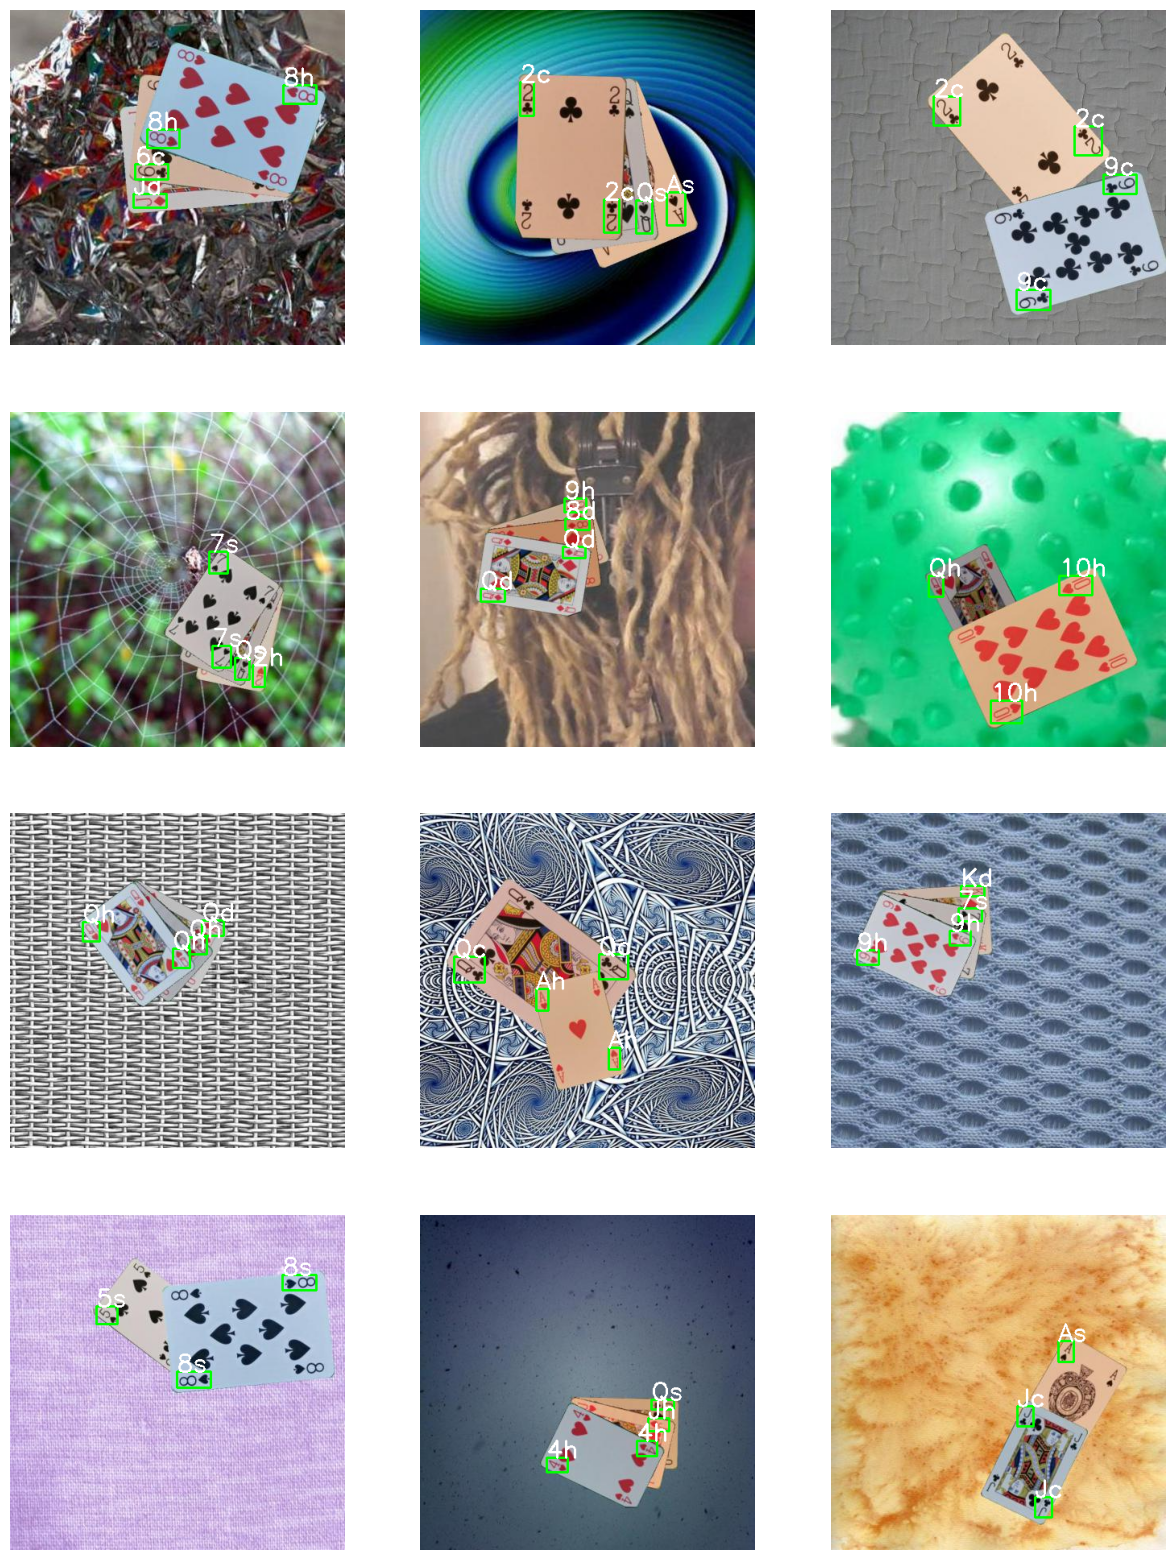

In [15]:
# Visualize 6 sample images with bounding boxes

visualize_image_with_annotation_bboxes(train_images, train_labels)

In [16]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[-1])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 416x416 and 3 channels


# **3. TRAINING**

In [17]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    data= yaml_path,
    epochs = 1,
    imgsz = (height, width, channels),
    seed = 42,
    batch = 8,
    workers = 4,
    patience = 5,
    name = 'yolov8n_custom')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3895MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/playing-cards-object-detection-dataset/data.yaml, epochs=1, time=None, patience=5, batch=8, imgsz=(416, 416, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

100%|██████████| 755k/755k [00:00<00:00, 11.4MB/s]

Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 225 layers, 3020988 parameters, 3020972 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=416'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /home/playing-cards-object-detection-dataset/train/labels.cache... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:00<?, ?it/s]
val: Scanning /home/playing-cards-object-detection-dataset/valid/labels.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n_custom2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.847G        1.4      4.506     0.9634         37        416: 100%|██████████| 1750/1750 [01:47<00:00, 16.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:20<00:00, 12.00it/s]


                   all       4000      15159     0.0486      0.122     0.0391     0.0309

1 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/yolov8n_custom2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom2/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom2/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3895MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:15<00:00, 15.91it/s]


                   all       4000      15159     0.0485      0.121     0.0391     0.0308
                   10c        180        282     0.0364     0.0213     0.0288     0.0219
                   10d        188        290     0.0669       0.31     0.0596     0.0465
                   10h        201        322     0.0434      0.457     0.0498     0.0387
                   10s        165        250     0.0361       0.12      0.038     0.0288
                    2c        193        295      0.026     0.0678     0.0271     0.0212
                    2d        167        259     0.0112     0.0116     0.0216     0.0177
                    2h        187        294     0.0233     0.0272     0.0258     0.0209
                    2s        192        299       0.05     0.0334     0.0305     0.0235
                    3c        201        308     0.0472     0.0909     0.0437     0.0361
                    3d        167        250     0.0489      0.024     0.0267     0.0219
                    3

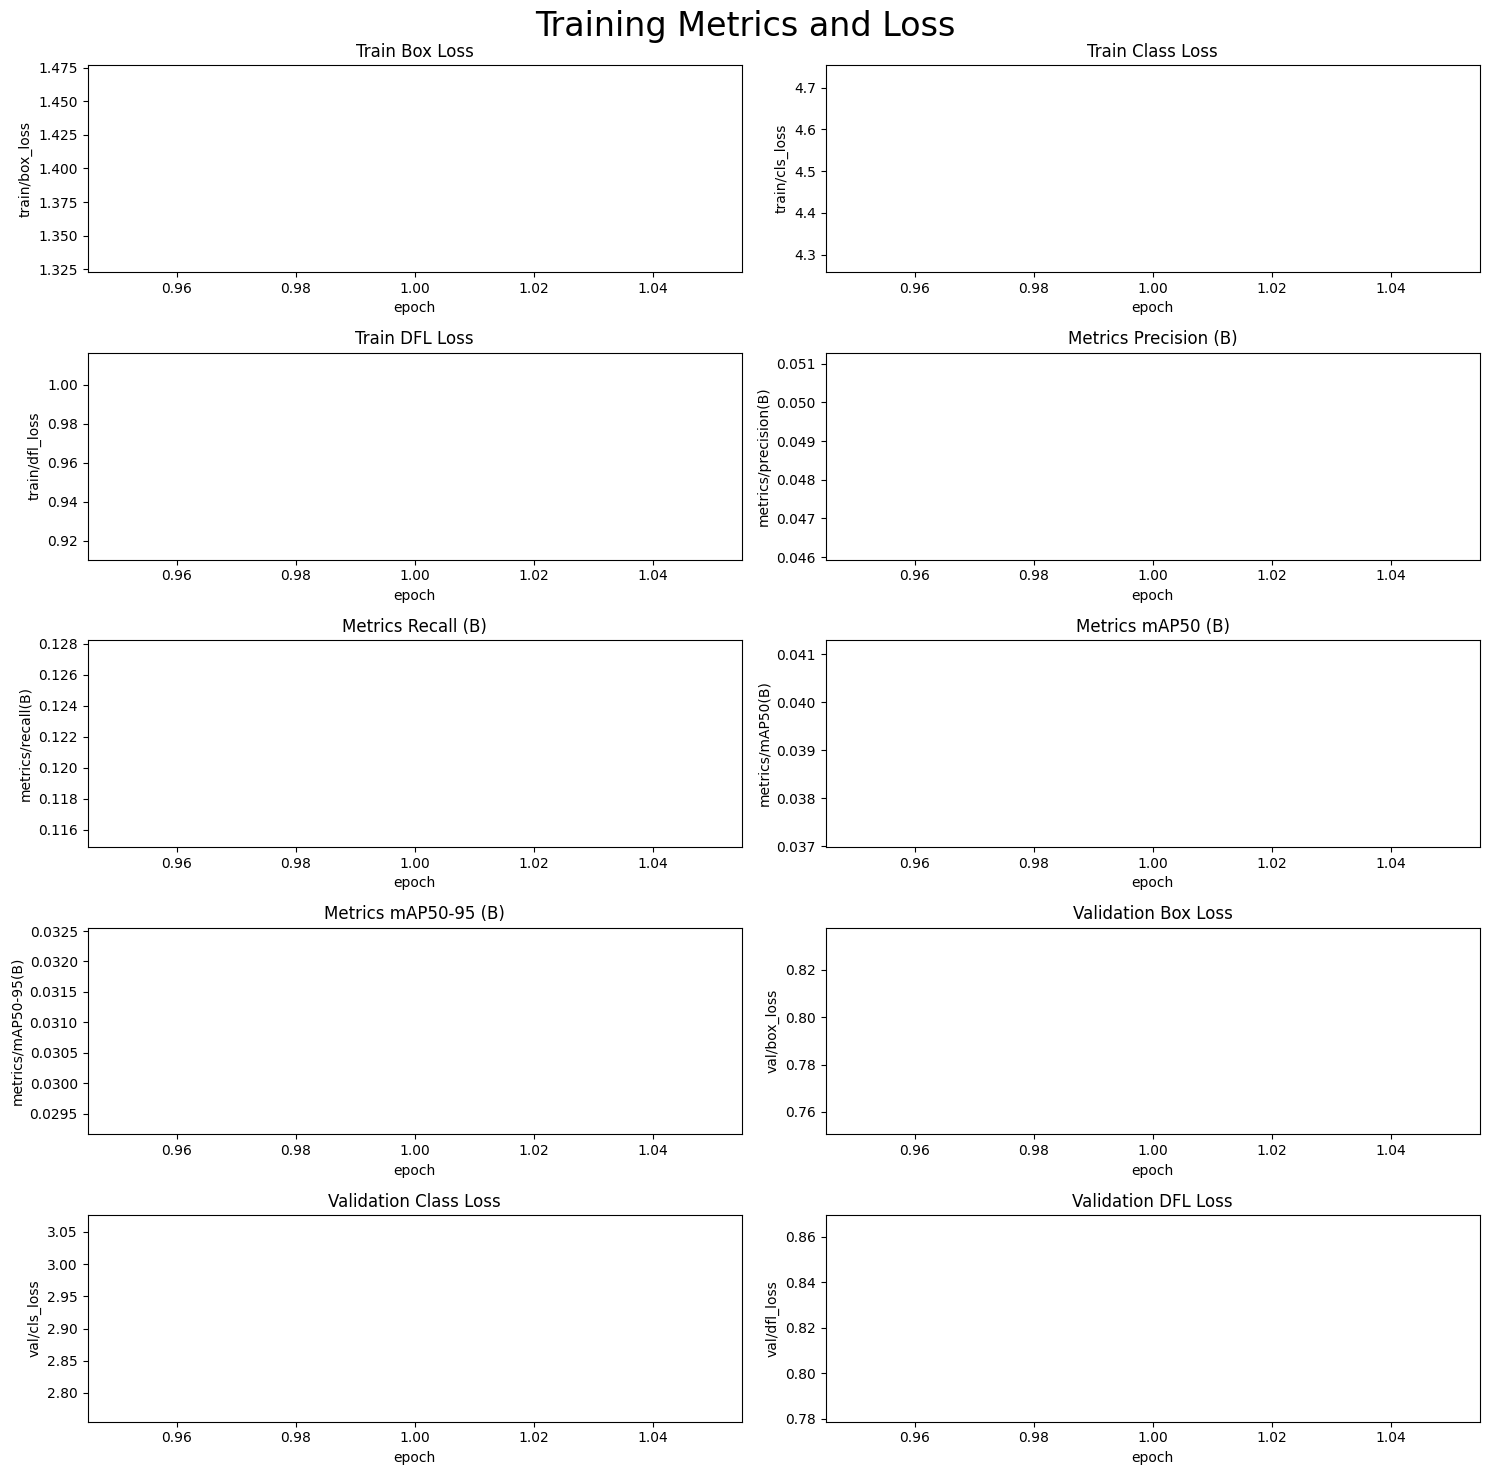

In [18]:
# plot the result

%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('./runs/detect/yolov8n_custom/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# **4. EVALUATION**

In [19]:
# Loading the best performing model
model = YOLO('./runs/detect/yolov8n_custom/weights/best.pt')

# Evaluating the model on test dataset
metrics = model.val(conf=0.25, split='test')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3895MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/playing-cards-object-detection-dataset/test/labels... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<00:00, 3435.88it/s]


val: New cache created: /home/playing-cards-object-detection-dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:06<00:00, 20.00it/s]


                   all       2000       7588    0.00296   0.000258    0.00151    0.00106
                   10c         89        137          0          0          0          0
                   10d        103        170          0          0          0          0
                   10h        100        149      0.154     0.0134     0.0786      0.055
                   10s         96        151          0          0          0          0
                    2c         90        139          0          0          0          0
                    2d        101        158          0          0          0          0
                    2h        100        156          0          0          0          0
                    2s         95        153          0          0          0          0
                    3c         98        155          0          0          0          0
                    3d         95        143          0          0          0          0
                    3

In [20]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.001058099978676902
Mean Average Precision @ .50   : 0.0015124260355029587
Mean Average Precision @ .70   : 0.0015124260355029587


# **5. PREDICTION**

In [21]:
# Function to perform detections with trained model
def predict_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Pass the image through the detection model and get the result
    detect_result = model(image)

    # Plot the detections
    detect_image = detect_result[0].plot()

    # Convert the image to RGB format
    detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

    return detect_image


0: 416x416 (no detections), 4.6ms
Speed: 0.6ms preprocess, 4.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.7ms
Speed: 0.6ms preprocess, 4.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.8ms
Speed: 0.7ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.9ms
Speed: 0.7ms preprocess, 4.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.7ms
Speed: 0.6ms preprocess, 4.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.8ms
Speed: 0.7ms preprocess, 4.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 5.5ms
Speed: 0.7ms preprocess, 5.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 4.9ms
Speed: 0.6ms preprocess, 4.9ms inference, 0.5ms 

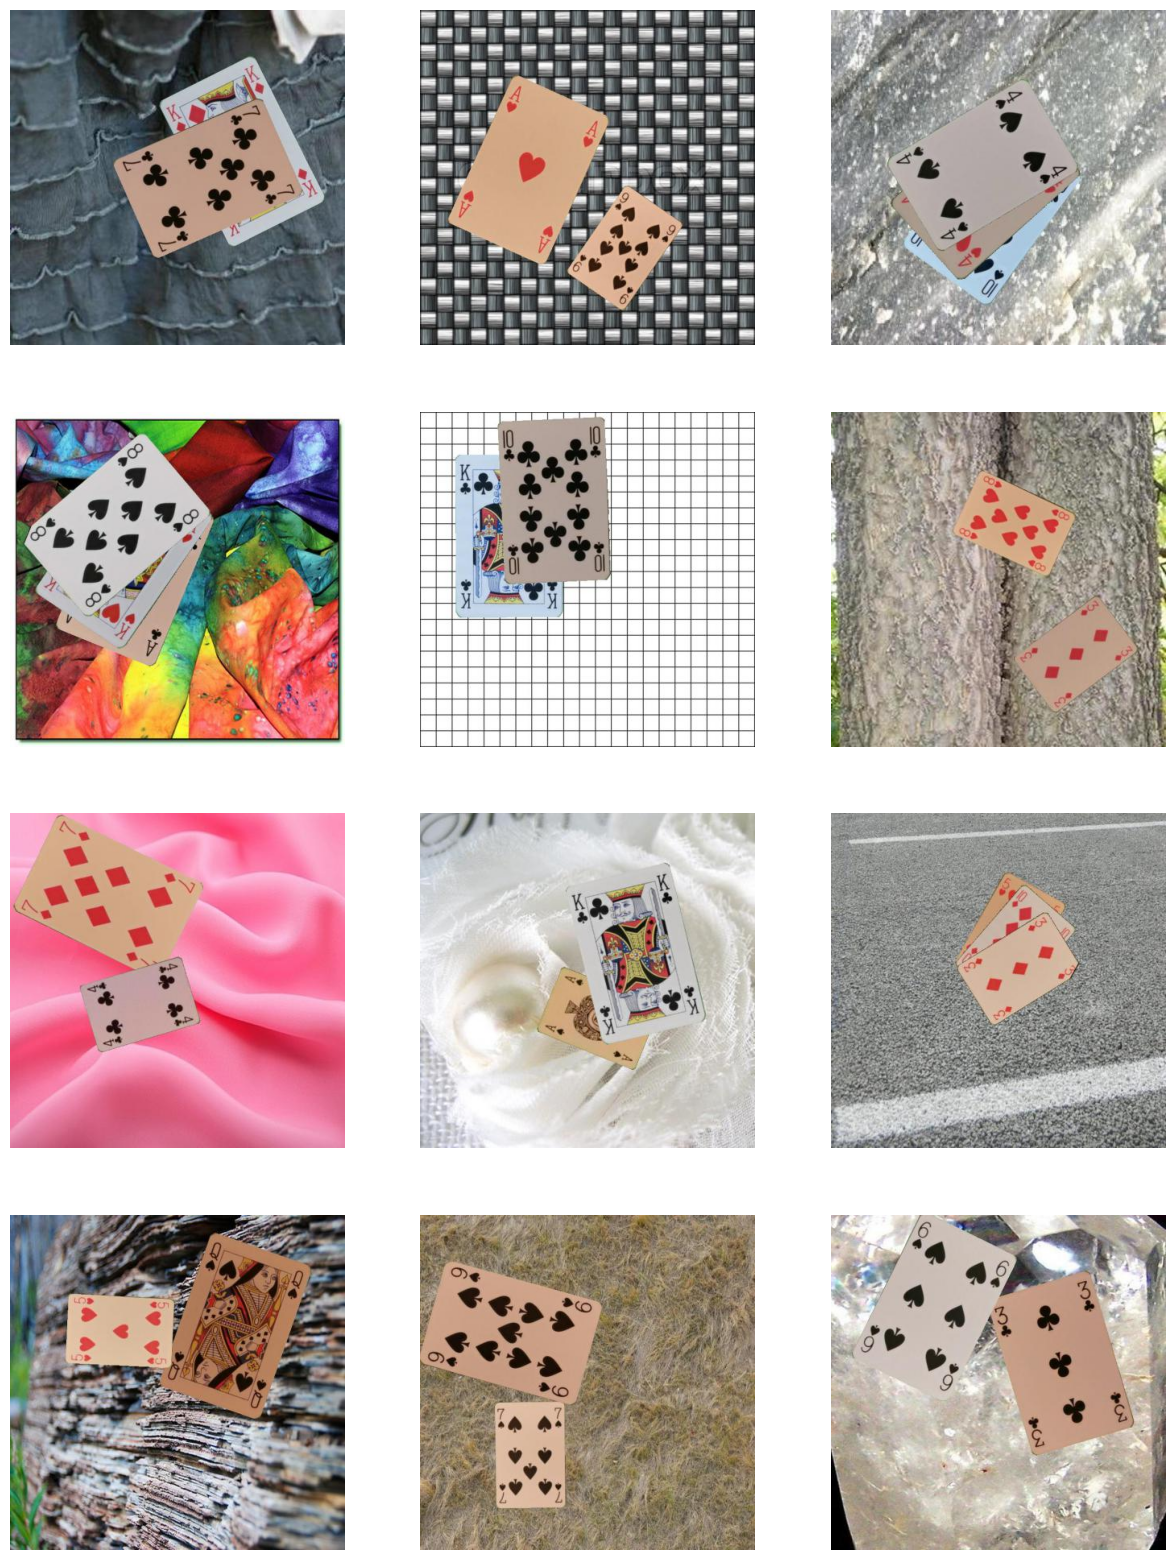

In [22]:
# Get list of all the image files in the test directory
image_files = sorted(os.listdir(test_images))

# Choose 12 random image files from the list
sample_image_files = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Loop over the random images and plot the detections of the trained model
for i, image_file in enumerate(sample_image_files):
    row = i // 3
    col = i % 3

    # Load the current image and run object detection
    image_path = os.path.join(test_images, image_file)
    detect_image = predict_detection(image_path)

    axs[row, col].imshow(detect_image)
    axs[row, col].axis('off')

plt.show()